# Demo  

This is a demonstration notebook of how fast annealed Langevin vs. RMSGLD converges for the NCSN model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import shutil
import yaml
import sys
import torch
import argparse
import numpy as np
from runners import *
from main import dict2namespace
from visualise_utils import *

We load the weights from the original NCSN paper, which uses `yaml` file to configure the model. The configuration file is `configs/anneal.yml`.

In [3]:
# with open(os.path.join('configs', 'anneal.yml'), 'r') as f:
#     config = yaml.safe_load(f)
# config['device'] = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

with open(os.path.join('configs', 'anneal_cifar10.yml'), 'r') as f:
    config = yaml.safe_load(f)
config['device'] = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

config['device'] = 'mps'
config = dict2namespace(config)

Addtionally, the `args` must be passed into the runner to get directories for image and log outputs.

In [4]:
args = argparse.Namespace()
setattr(args, 'test', False)
# setattr(args, 'log', 'run/logs/mnist/')
setattr(args, 'log', 'run/logs/cifar10/')
setattr(args, 'image_folder', 'images/mnist/')

In [5]:
# sampler is one of
adam_args = {'n_steps':20, 
              'lr':0.00005, 
              'sampler':'adamald', 
              'beta1':0.99, 
              'beta2':0.999, 
              'naive': True,
              'annealing': False,
              'eps': 1e-7}

rms_args = {'n_steps':20,
            'lr':0.05,
            'sampler':'rmsald',
            'beta':0.99,
            'annealing': False,
            'eps': 1e-4}

monge_args = {'n_steps':20,
              'lr':0.00005,
              'sampler': 'mongeald',
              'alpha_2': 1e-3,
              'annealing': False,
              'lambd': 0.9,
              'use_ema_grad': True}

not_alg_args = {'n_steps':20,
                'lr':0.00005,
                'sampler':'not_ald',
                'annealing': False,
}               

ald_args = {'n_steps':20,
            'lr':0.00005,
            'sampler':'ald',
            'annealing': True,}
            

# extra_args = {'n_steps':20, 'lr':20, 'sampler':'rmsald', 'beta':0.99}
# extra_args = {'n_steps':20, 'lr':0.00002, 'sampler':'ald'}
extra_args = dict2namespace(ald_args)
runner = AnnealRunner(args, config, extra_args)

In [6]:
all_samples = runner.test()

annealed Langevin dynamics sampling: 100%|██████████| 10/10 [04:38<00:00, 27.84s/it]


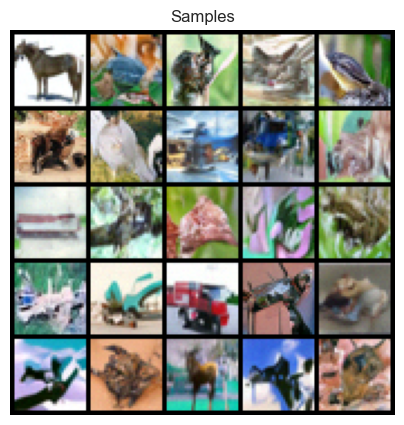

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in range(len(all_samples)):
    if i == len(all_samples) - 1:
        show_samples(all_samples[i], 
                     ax,
                    config.data.image_size,
                    config.data.channels,
                    grid_size=(5, 5),)

In [8]:
!rm -rf images/mnist/*.png
!rm -rf images/mnist/*.pth

zsh:1: no matches found: images/mnist/*.png
zsh:1: no matches found: images/mnist/*.pth
